# $\Lambda CDM$ parameters on the power spectrum

there are 6 parameters in the $\Lambda CDM$ model:
- Baryon density $\Omega_b$
- CDM density $\Omega_c$
- hubble constant $h$
- optical depth $\tau$
- primordial scalar tilt $n_s$
- primordial scalar amplitude $A_s$

In [1]:
import camb
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize
import numpy as np

In [2]:
def lcdm_params():
    params = camb.read_ini("planck_2018.ini")
    return params

## changing the baryon density parameter

In [3]:
om_b = np.linspace(0.01, 0.03, 5)
norm = Normalize(vmin=min(om_b), vmax=max(om_b))
cmap = cm.viridis

om_b_changes = []
for ob in om_b:
    pars = lcdm_params()
    pars.ombh2 = ob
    results = camb.get_results(pars)
    powers = results.get_cmb_power_spectra(pars, CMB_unit="muK")
    om_b_changes.append((ob, powers))

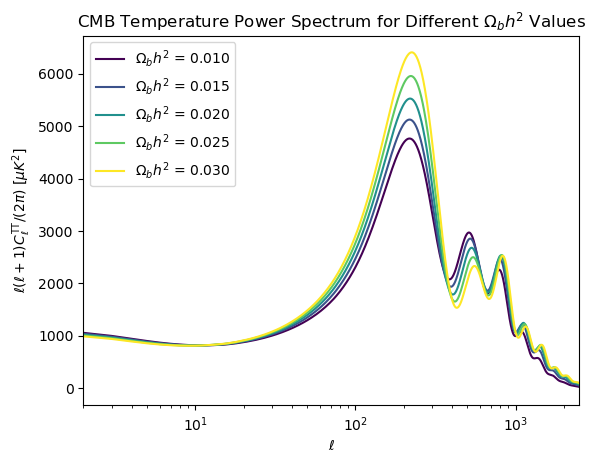

In [4]:
# TT spectrum
for Om_b, powers in om_b_changes:
    totCL = powers["total"]
    ls = np.arange(totCL.shape[0])
    color = cmap(norm(Om_b))
    plt.plot(ls, totCL[:, 0], color=color, label=r"$\Omega_bh^2$ = %.3f" % (Om_b))

plt.xlabel("$\ell$")
plt.ylabel("$\ell(\ell+1)C_\ell^{\\rm TT}/(2\pi)$ [$\mu K^2$]")
plt.title("CMB Temperature Power Spectrum for Different $\\Omega_bh^2$ Values")
plt.legend()
plt.xlim([2, 2500])
plt.xscale("log")
plt.show()

### Description

**TT**
1) large scales: Sachs-Wolfe plateau lower for higher densities
2) first acoustic peak: greater for higher densities
3) small scales: oscillations suppressed

### Explanation

**TT**
- increase in density leads to deeper SW gravitational wells
- photons lose more energy to escape the wells and so large scale temperature fluctuations are lower in magnitude
- greater baryon density means the compression is stronger in the BAO which increases the first peak amplitude
- smaller peaks are damped as the oscillations are slower due to the increase in the number of baryons

## changing the CDM density parameter

In [5]:
om_c = np.linspace(0.05, 0.25, 5)
norm = Normalize(vmin=min(om_c), vmax=max(om_c))
cmap = cm.viridis

om_c_changes = []
for oc in om_c:
    pars = lcdm_params()
    pars.omch2 = oc
    results = camb.get_results(pars)
    powers = results.get_cmb_power_spectra(pars, CMB_unit="muK")
    om_c_changes.append((oc, powers))

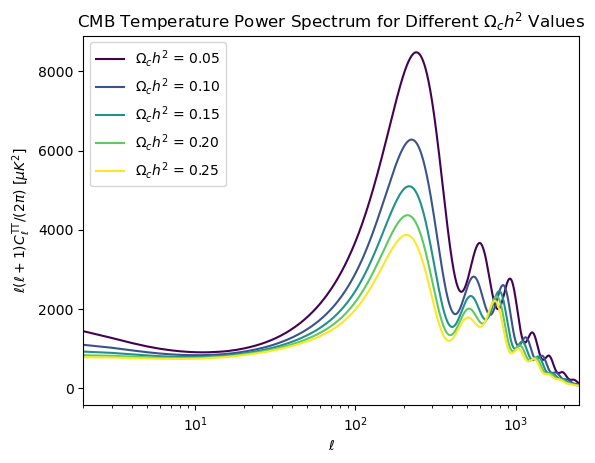

In [6]:
# TT spectrum
for Om_c, powers in om_c_changes:
    totCL = powers["total"]
    ls = np.arange(totCL.shape[0])
    color = cmap(norm(Om_c))
    plt.plot(ls, totCL[:, 0], color=color, label=r"$\Omega_ch^2$ = %.2f" % (Om_c))

plt.xlabel("$\ell$")
plt.ylabel("$\ell(\ell+1)C_\ell^{\\rm TT}/(2\pi)$ [$\mu K^2$]")
plt.title("CMB Temperature Power Spectrum for Different $\\Omega_ch^2$ Values")
plt.legend()
plt.xlim([2, 2500])
plt.xscale("log")
plt.show()

## Description

**TT**
1) large scales: Sachs-Wolfe plateau decreases
2) first acoustic peak: decreases
3) small scales: the amplitudes decrease and shift to the left (larger scales)

### Explanation

**TT**
- the increase in CDM density deepens the gravitational wells the photons must climb out of
- the CDM does not interact directly with the photons and so is not coupled to the photon-baryon fluid but the gravitational potentials produced by the CDM damp the oscillations of the fluid and reduce the perturbations from the BAO
- the increase in CDM will slow the expansion of the universe and increase the sound horizon. As a result the perturbations are larger and the peaks shift to the left
- gravitational driving of the photon-baryon fluid due to the CDM potentials increase the size of the higher peaks compared to the first peak as the fluid oscillates faster due to the deeper potentials

## changing the hubble constant

In [7]:
h = np.linspace(50, 80, 5)
h0_changes = []
norm = Normalize(vmin=min(h), vmax=max(h))
cmap = cm.viridis
for h0 in h:
    pars = lcdm_params()
    pars.H0 = h0
    results = camb.get_results(pars)
    powers = results.get_cmb_power_spectra(pars, CMB_unit="muK")
    h0_changes.append((h0, powers))

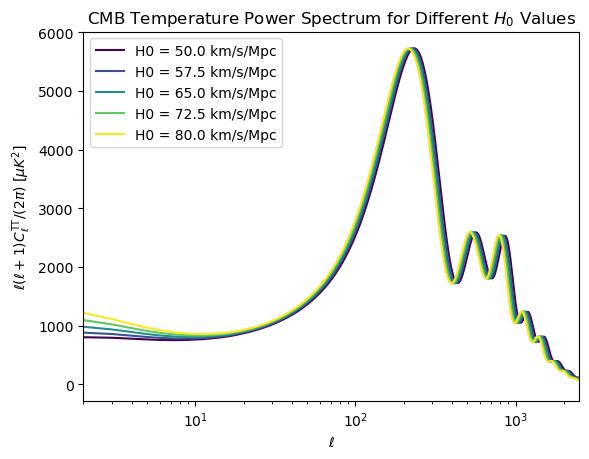

In [8]:
for H0, powers in h0_changes:
    totCL = powers["total"]
    ls = np.arange(totCL.shape[0])
    color = cmap(norm(H0))
    plt.plot(ls, totCL[:, 0], color=color, label=r"H0 = %.1f km/s/Mpc" % (H0))

plt.xlabel("$\ell$")
plt.ylabel("$\ell(\ell+1)C_\ell^{\\rm TT}/(2\pi)$ [$\mu K^2$]")
plt.title("CMB Temperature Power Spectrum for Different $H_0$ Values")
plt.legend()
plt.xlim([2, 2500])
plt.xscale("log")
plt.show()

### Description

**TT**
1) large scales: the Sachs-Wolfe plateau increases with $h$
2) the peaks shift to the left (larger scales)

### Explanation

## changing the optical depth

In [9]:
t = np.linspace(0.01, 0.2, 5)
tau_changes = []
norm = Normalize(vmin=min(t), vmax=max(t))
cmap = cm.viridis
for tau in t:
    pars = lcdm_params()
    pars.Reion.optical_depth = tau
    results = camb.get_results(pars)
    powers = results.get_cmb_power_spectra(pars, CMB_unit="muK")
    tau_changes.append((tau, powers))

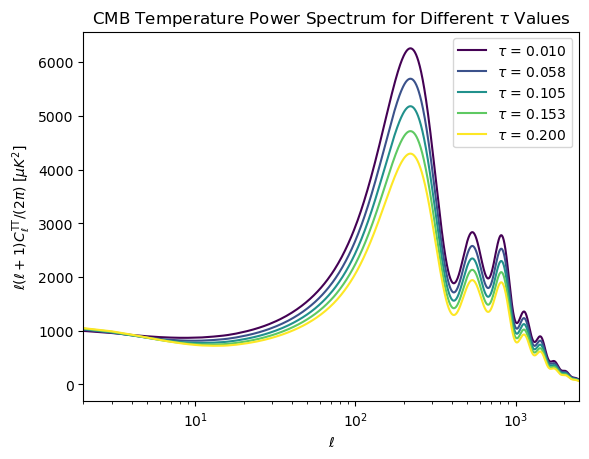

In [10]:
for tau, powers in tau_changes:
    totCL = powers["total"]
    ls = np.arange(totCL.shape[0])
    color = cmap(norm(tau))
    plt.plot(ls, totCL[:, 0], color=color, label=r"$\tau$ = %.3f" % (tau))

plt.xlabel("$\ell$")
plt.ylabel("$\ell(\ell+1)C_\ell^{\\rm TT}/(2\pi)$ [$\mu K^2$]")
plt.title("CMB Temperature Power Spectrum for Different $\\tau$ Values")
plt.legend()
plt.xlim([2, 2500])
plt.xscale("log")
plt.show()

### Description

**TT**
- the acoustic peaks shift downwards

### Explanation

## changing the scalar tilt

In [11]:
ns = np.linspace(0.6, 1.2, 5)
ns_changes = []
norm = Normalize(vmin=min(ns), vmax=max(ns))
cmap = cm.viridis
for n in ns:
    pars = lcdm_params()
    pars.InitPower.set_params(ns=n)
    results = camb.get_results(pars)
    powers = results.get_cmb_power_spectra(pars, CMB_unit="muK")
    ns_changes.append((n, powers))

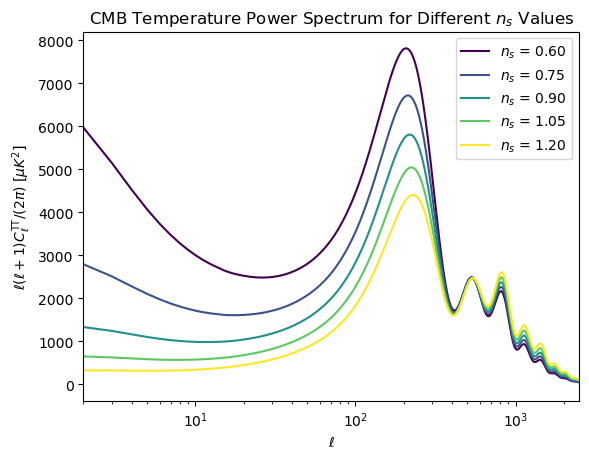

In [12]:
for n, powers in ns_changes:
    totCL = powers["total"]
    ls = np.arange(totCL.shape[0])
    color = cmap(norm(n))
    plt.plot(ls, totCL[:, 0], color=color, label=r"$n_s$ = %.2f" % (n))

plt.xlabel("$\ell$")
plt.ylabel("$\ell(\ell+1)C_\ell^{\\rm TT}/(2\pi)$ [$\mu K^2$]")
plt.title("CMB Temperature Power Spectrum for Different $n_s$ Values")
plt.legend()
plt.xlim([2, 2500])
plt.xscale("log")
plt.show()

### Description

**TT**
1) large scales: the plateau decreases with increasing $n_s$
2) first acoustic peak: the peak decreases with increasing $n_s$
3) small scales: the higher peaks are more pronounced with increasing $n_s$

### Explanation

## changing the scalar amplitude

In [13]:
As = np.linspace(1e-9, 3e-9, 5)
As_changes = []
norm = Normalize(vmin=min(As), vmax=max(As))
cmap = cm.viridis
for A in As:
    pars = lcdm_params()
    pars.InitPower.set_params(As=A)
    results = camb.get_results(pars)
    powers = results.get_cmb_power_spectra(pars, CMB_unit="muK")
    As_changes.append((A, powers))

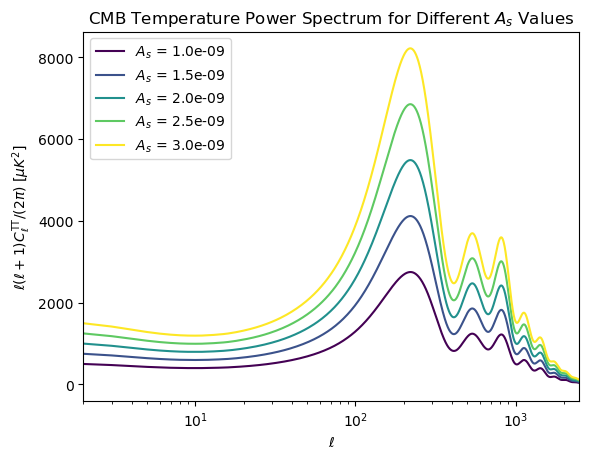

In [14]:
for A, powers in As_changes:
    totCL = powers["total"]
    ls = np.arange(totCL.shape[0])
    color = cmap(norm(A))
    plt.plot(ls, totCL[:, 0], color=color, label=r"$A_s$ = %.1e" % (A))

plt.xlabel("$\ell$")
plt.ylabel("$\ell(\ell+1)C_\ell^{\\rm TT}/(2\pi)$ [$\mu K^2$]")
plt.title("CMB Temperature Power Spectrum for Different $A_s$ Values")
plt.legend()
plt.xlim([2, 2500])
plt.xscale("log")
plt.show()

### Description

**TT**
1) large scales: the plateau increases with $A_s$
2) first acoustic peak: peak increases with $A_s$
3) large scale: peaks more pronounced with $A_s$

### Explanation